In [1]:
pip install statsmodels

In [2]:
import numpy as np
import pandas as pd 
import scipy.stats as stats
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima.model import ARIMA


%matplotlib inline

In [12]:
muebles = pd.read_csv('C:/Users/DESKTOP/Desktop/Base_Prueba.csv')
muebles

,CR_PLAZA,CR_TIENDA,muebles,Venta,Margen,Unidades
0,Plaza_20,15OUDBR,MUEBLE_170,10034.486855,1041.710577,94
1,Plaza_20,15TNDCT,MUEBLE_170,9943.775708,1099.028857,123
2,Plaza_20,15PIKTX,MUEBLE_170,10040.815246,992.882449,99
3,Plaza_20,15NGSWF,MUEBLE_170,10021.969733,1060.207795,100
4,Plaza_20,15EZOGG,MUEBLE_170,10073.559794,941.843890,110
...,...,...,...,...,...,...
1564475,Plaza_21,15IHRYJ,MUEBLE_98,9944.216322,1061.113915,100
1564476,Plaza_21,15DZFXB,MUEBLE_98,9866.097754,1167.799163,87
1564477,Plaza_21,15HMBLV,MUEBLE_98,9950.235463,1024.066181,115
1564478,Plaza_21,15NDUNB,MUEBLE_98,10110.942810,1147.196017,110


In [13]:
tipo_muebles = muebles['muebles']
tipo_muebles

0          MUEBLE_170
1          MUEBLE_170
2          MUEBLE_170
3          MUEBLE_170
4          MUEBLE_170
              ...    
1564475     MUEBLE_98
1564476     MUEBLE_98
1564477     MUEBLE_98
1564478     MUEBLE_98
1564479     MUEBLE_98
Name: muebles, Length: 1564480, dtype: object

In [14]:
pd.unique(tipo_muebles)

array(['MUEBLE_170', 'MUEBLE_103', 'MUEBLE_165', 'MUEBLE_222',
       'MUEBLE_99', 'MUEBLE_111', 'MUEBLE_24', 'MUEBLE_160', 'MUEBLE_70',
       'MUEBLE_85', 'MUEBLE_61', 'MUEBLE_114', 'MUEBLE_80', 'MUEBLE_290',
       'MUEBLE_23', 'MUEBLE_288', 'MUEBLE_29', 'MUEBLE_28', 'MUEBLE_101',
       'MUEBLE_65', 'MUEBLE_150', 'MUEBLE_146', 'MUEBLE_18', 'MUEBLE_68',
       'MUEBLE_106', 'MUEBLE_81', 'MUEBLE_112', 'MUEBLE_32', 'MUEBLE_45',
       'MUEBLE_294', 'MUEBLE_341', 'MUEBLE_73', 'MUEBLE_152', 'MUEBLE_40',
       'MUEBLE_33', 'MUEBLE_90', 'MUEBLE_280', 'MUEBLE_250', 'MUEBLE_134',
       'MUEBLE_105', 'MUEBLE_340', 'MUEBLE_21', 'MUEBLE_69', 'MUEBLE_136',
       'MUEBLE_127', 'MUEBLE_9', 'MUEBLE_1', 'MUEBLE_55', 'MUEBLE_59',
       'MUEBLE_209', 'MUEBLE_100', 'MUEBLE_82', 'MUEBLE_44', 'MUEBLE_92',
       'MUEBLE_357', 'MUEBLE_180', 'MUEBLE_10', 'MUEBLE_5', 'MUEBLE_4',
       'MUEBLE_3', 'MUEBLE_96', 'MUEBLE_86', 'MUEBLE_122', 'MUEBLE_50',
       'MUEBLE_97', 'MUEBLE_36', 'MUEBLE_35', 'MUEBLE

In [32]:
muebles['muebles'].value_counts().head(20)

MUEBLE_41     220022
MUEBLE_16     203343
MUEBLE_280    133885
MUEBLE_26      19873
MUEBLE_65      19576
MUEBLE_42      19235
MUEBLE_53      19197
MUEBLE_44      19178
MUEBLE_77      19051
MUEBLE_95      18737
MUEBLE_76      18658
MUEBLE_82      18654
MUEBLE_63      18504
MUEBLE_107     18138
MUEBLE_55      18104
MUEBLE_66      18089
MUEBLE_74      17937
MUEBLE_13      17683
MUEBLE_87      17245
MUEBLE_27      17167
Name: muebles, dtype: int64

In [16]:
muebles['muebles'].value_counts(normalize=True)

MUEBLE_41     1.406359e-01
MUEBLE_16     1.299748e-01
MUEBLE_280    8.557796e-02
MUEBLE_26     1.270262e-02
MUEBLE_65     1.251278e-02
                  ...     
MUEBLE_494    6.391900e-07
MUEBLE_475    6.391900e-07
MUEBLE_499    6.391900e-07
MUEBLE_477    6.391900e-07
MUEBLE_492    6.391900e-07
Name: muebles, Length: 499, dtype: float64

# Ventas individuales

In [34]:
muebles2 = muebles[muebles['Venta'] > muebles['Venta'].mean()]
muebles2.sort_values('Venta', ascending = False).head(10)

,CR_PLAZA,CR_TIENDA,muebles,Venta,Margen,Unidades
307814,Plaza_7,15CHYZE,MUEBLE_57,10565.906120,1049.110729,92
760198,Plaza_8,15XMTKX,MUEBLE_79,10506.379262,991.622349,95
1375545,Plaza_18,15CBKDC,MUEBLE_64,10469.473477,1011.487348,93
1240656,Plaza_1,15JEJSD,MUEBLE_52,10460.648300,1024.613917,103
654289,Plaza_19,15FWRVY,MUEBLE_204,10454.813484,800.400416,87
114287,Plaza_9,15MOXLU,MUEBLE_74,10448.821366,951.997733,91
842622,Plaza_5,15BFKIA,MUEBLE_16,10448.057501,1018.169129,98
379934,Plaza_6,15VZFDL,MUEBLE_41,10440.277092,1089.546929,95
1272669,Plaza_1,15HQJGM,MUEBLE_41,10437.544137,907.130882,101
598859,Plaza_10,15ZETRE,MUEBLE_107,10436.691119,1066.781690,100


In [25]:
muebles['Venta'].mean()

10000.07660267537

# Unidades individuales

In [33]:
muebles3 = muebles[muebles['Unidades'] > muebles['Unidades'].mean()]
muebles3.sort_values('Unidades', ascending = False).head(10)

,CR_PLAZA,CR_TIENDA,muebles,Venta,Margen,Unidades
142445,Plaza_16,15GJBBU,MUEBLE_103,10194.257696,1041.197767,150
690843,Plaza_19,15JXRPH,MUEBLE_72,10103.233524,715.457734,150
511777,Plaza_12,15BBDSM,MUEBLE_280,10063.064490,947.545382,149
543345,Plaza_12,15NYKZV,MUEBLE_11,9894.938945,929.665204,148
1046477,Plaza_15,15CTJPK,MUEBLE_67,9952.914133,959.406015,148
924542,Plaza_14,15WXTWQ,MUEBLE_66,10022.207911,983.298204,148
270843,Plaza_7,15LYSGT,MUEBLE_16,9876.125918,940.648648,148
1429741,Plaza_17,15GGTMO,MUEBLE_112,10095.759521,917.327672,147
1357001,Plaza_18,15POKRZ,MUEBLE_280,10029.004436,895.411815,147
459813,Plaza_2,15YNBXJ,MUEBLE_74,10093.192616,844.530732,147


In [30]:
muebles['Unidades'].mean()

100.02220993556965

# Utilidades individuales

In [35]:
muebles3 = muebles[muebles['Margen'] > muebles['Margen'].mean()]
muebles3.sort_values('Margen', ascending = False).head(10)

,CR_PLAZA,CR_TIENDA,muebles,Venta,Margen,Unidades
1374626,Plaza_18,15LEZWY,MUEBLE_52,9888.159448,1516.029325,92
461857,Plaza_2,15QBUIH,MUEBLE_174,9939.628039,1473.192130,95
421787,Plaza_2,15CVHEL,MUEBLE_82,10074.198502,1467.267732,91
841533,Plaza_5,15SWDIT,MUEBLE_16,10069.649598,1461.679987,107
575908,Plaza_10,15HHVKS,MUEBLE_24,10026.840108,1456.928025,83
1150137,Plaza_11,15RJCZN,MUEBLE_28,10041.847940,1456.402043,103
748723,Plaza_8,15WSRLB,MUEBLE_44,9900.551550,1454.342913,104
485311,Plaza_2,15XSIHC,MUEBLE_41,9858.409433,1452.345233,107
1399424,Plaza_18,15BHSUF,MUEBLE_87,9926.996785,1450.669047,93
1401262,Plaza_18,15EVKBW,MUEBLE_158,10086.089220,1449.904161,95


# Suma de las ventas de cada mueble

In [64]:
muebles_juntos_Venta = muebles.groupby('muebles')['Venta'].sum()
df_muebles_juntos_Venta = pd.DataFrame(muebles_juntos)
df_muebles_juntos_Venta.sort_values('Venta', ascending = False).head(10)

,Venta
muebles,
MUEBLE_41,2.200268e+09
MUEBLE_16,2.033386e+09
MUEBLE_280,1.338867e+09
MUEBLE_26,1.987302e+08
MUEBLE_65,1.957835e+08
MUEBLE_42,1.923703e+08
MUEBLE_53,1.919896e+08
MUEBLE_44,1.918076e+08
MUEBLE_77,1.905181e+08


In [65]:
df_muebles_juntos_Venta.sort_values('Venta', ascending = False).tail(10)

,Venta
muebles,
MUEBLE_499,10058.544430
MUEBLE_492,10049.712087
MUEBLE_477,10041.530343
MUEBLE_486,9954.995904
MUEBLE_482,9950.231171
MUEBLE_488,9938.060605
MUEBLE_493,9926.377833
MUEBLE_478,9922.239818
MUEBLE_498,9863.690716


# Suma de las Utilidades por cada mueble

In [66]:
muebles_juntos_Utilidad = muebles.groupby('muebles')['Margen'].sum()
df_muebles_juntos_Utilidad = pd.DataFrame(muebles_juntos_Utilidad)
df_muebles_juntos_Utilidad.sort_values('Margen', ascending = False).head(10)

,Margen
muebles,
MUEBLE_41,2.199827e+08
MUEBLE_16,2.033244e+08
MUEBLE_280,1.339256e+08
MUEBLE_26,1.985730e+07
MUEBLE_65,1.958385e+07
MUEBLE_42,1.923073e+07
MUEBLE_44,1.919082e+07
MUEBLE_53,1.918767e+07
MUEBLE_77,1.905995e+07


In [67]:
df_muebles_juntos_Utilidad.sort_values('Margen', ascending = False).tail(10)

,Margen
muebles,
MUEBLE_499,1011.714254
MUEBLE_492,1008.229592
MUEBLE_495,973.883021
MUEBLE_490,963.809370
MUEBLE_485,958.816918
MUEBLE_494,948.926190
MUEBLE_470,924.258557
MUEBLE_498,866.399924
MUEBLE_486,838.744407


# Suma de las Unidades por cada mueble

In [68]:
muebles_juntos_Unidades = muebles.groupby('muebles')['Unidades'].sum()
df_muebles_juntos_Unidades = pd.DataFrame(muebles_juntos_Unidades)
df_muebles_juntos_Unidades.sort_values('Unidades', ascending = False).head(10)

,Unidades
muebles,
MUEBLE_41,22000471
MUEBLE_16,20336774
MUEBLE_280,13390056
MUEBLE_26,1986434
MUEBLE_65,1956284
MUEBLE_42,1926143
MUEBLE_53,1921464
MUEBLE_44,1920875
MUEBLE_77,1905850


In [69]:
df_muebles_juntos_Unidades.sort_values('Unidades', ascending = False).tail(10)

,Unidades
muebles,
MUEBLE_482,101
MUEBLE_498,101
MUEBLE_477,99
MUEBLE_486,99
MUEBLE_470,97
MUEBLE_493,97
MUEBLE_495,96
MUEBLE_494,95
MUEBLE_475,91


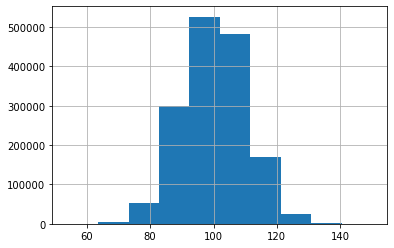

In [72]:
muebles['Unidades'].hist();

In [81]:
from scipy.stats import chisquare
test.chi2=chisq.test(muebles['Unidades'],p== 1)
pchisq(test.chi2[[1]],3,lower.tail==FALSE)

NameError: name 'chisq' is not defined